In [25]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer, hamming_loss
import pickle
from matplotlib import pyplot as plt

In [2]:
Xtrain = pd.read_csv("ImputedX_train.csv")
Ytrain = pd.read_csv("Y_train.csv")
Xtest = pd.read_csv("ImputedX_test.csv")
Ytest = pd.read_csv("Y_test.csv")

In [3]:
Xtrain.head()

,revenue,vote_count,popularity,budget,vote_average,runtime,red_pixel,green_pixel,blue_pixel,release_date_month,...,overview_war,overview_way,overview_wife,overview_woman,overview_women,overview_work,overview_world,overview_year,overview_years,overview_young
0,0.0,0.0,0.050000,0.0,0.0,8.0,120.972533,107.498233,91.274216,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.015882,0.0,0.0,0.0,96.474603,111.797488,91.616365,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000174,0.0,0.0,0.0,14.865752,36.360349,71.807880,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,5.0,0.080580,0.0,5.7,6.0,55.146994,38.863562,32.915946,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,6.0,0.135852,0.0,6.7,90.0,103.211913,102.962288,102.971054,15.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


## Multiclass Prediction

In [4]:
params = {"max_features": ["log2", 500, None],
          "max_depth": [100, 250, 500],
          "n_estimators": [10, 20, 50]}

In [11]:
models = []

classes = Ytrain.columns.values
for i, cl in enumerate(classes):
    Ytrain_ = (Ytrain[cl] == 1).astype('int')
    rfc = GridSearchCV(RandomForestClassifier(n_jobs = -1), 
                       cv=5, 
                       param_grid = params, 
                       scoring=make_scorer(f1_score))
    rfc.fit(Xtrain, Ytrain_)
    models.append(rfc)

C:\Users\Sarah\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
# Generate multilabel form of predictions for train and test data
Ypred_train = np.zeros((len(Ytrain), len(classes)))
Ypred_test = np.zeros((len(Ytest), len(classes)))

for i,mod in enumerate(models):
    Ypred_train[:,i] = mod.predict(Xtrain)
    Ypred_test[:,i] = mod.predict(Xtest)

In [13]:
print "Train hamming loss:", hamming_loss(Ytrain, Ypred_train)
print "Test hamming loss:", hamming_loss(Ytest, Ypred_test)

Train hamming loss: 0.00377309052797
Test hamming loss: 0.0730945744881


#### Pickle the model list to avoid re-running this code:

In [20]:
# with open("models/multiclass-models.dat", "wb") as f:
#     pickle.dump(models, f)

In [ ]:
# # Code to re-load pickled models
# models = []
# with open("multiclass-models.dat", "rb") as f:
#     models = pickle.load(f)

## Multilabel Prediction

In [14]:
rfc_multilab = GridSearchCV(RandomForestClassifier(n_jobs = -1), 
                   cv=5, 
                   param_grid = params, 
                   scoring=make_scorer(f1_score, average='weighted'))

In [15]:
rfc_multilab.fit(Xtrain, Ytrain)

C:\Users\Sarah\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=1234,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['log2', 500, None], 'n_estimators': [10, 20, 50], 'max_depth': [100, 250, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score, average=weighted), verbose=0)

In [16]:
Ypred_multilab_train = rfc_multilab.predict(Xtrain)
Ypred_multilab_test = rfc_multilab.predict(Xtest)

In [17]:
print "Train hamming loss:", hamming_loss(Ytrain, Ypred_multilab_train)
print "Test hamming loss:", hamming_loss(Ytest, Ypred_multilab_test)

Train hamming loss: 0.000717935281017
Test hamming loss: 0.0753159119009


#### Pickle multi-label rf

In [21]:
# with open("models/multilabel-model.dat", "wb") as f:
#     pickle.dump(rfc_multilab, f)

In [ ]:
# # Reload multilabel model from file
# rfc_multilab = None
# with open("multilabel-model.dat", "rb") as f:
#     rfc_multilab = pickle.load(f)

### Performance Evaluation

In [23]:
f1_class_scores = [mod.best_score_  for mod,cls in zip(models,classes)]

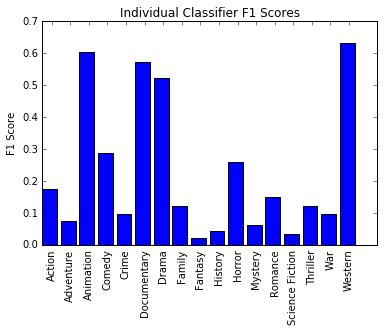

In [44]:
%matplotlib inline
fig, ax = plt.subplots()
ax.bar(range(len(classes)), f1_class_scores)
ax.set_xticks(np.array(range(len(classes)))+0.5)
ax.set_xticklabels(classes, rotation=90)
ax.set_ylabel("F1 Score")
ax.set_title("Individual Classifier F1 Scores")
plt.show()

In [45]:
genre_props = [np.sum(Ytrain[cl])/Ytrain.shape[0] for cl in classes]

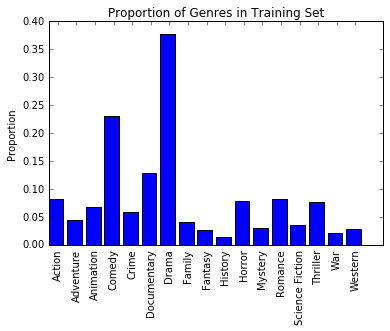

In [47]:
fig, ax = plt.subplots()
ax.bar(range(len(classes)), genre_props)
ax.set_xticks(np.array(range(len(classes)))+0.5)
ax.set_xticklabels(classes, rotation=90)
ax.set_ylabel("Proportion")
ax.set_title("Proportion of Genres in Training Set")
plt.show()